# Heavy Machines Sales - Regression & Time-Series Analysis

<center><img src="Cover.jpg", width='1080'/></center>

## Content Overview

1. Context and Scope
2. Evaluation
3. Features
4. Data Exploration
5. Data Preparation & Preprocessing
6. Modelling
7. Experimentation & Evaluation

## 1. Context and Scope

The goal of the project is to predict the sale price of a particular piece of heavy equiment sold at an auction based on it's `usage`, `equipment type`, and `configuration`. The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bulldozers" for customers to value what their heavy equipment fleet is worth at auction.

<b>About Fast Iron</b>

Fast Iron are a content-focused business that aids customers in creating enterprise data standards, cleansing data, and maintaining clean data. Utilizing proprietary applications and an ever growing data cleansing team, Fast Iron has normalized data for more than 2.5 million machine and customer records for the heavy equipment industry.

<b>Project Data</b>

There are 3 main datasets:

* `Train.csv` is the training set, which contains data through the end of 2011.
* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. 

For more information on this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/

## 2. Evaluation

The evaluation metric for this competition is the `RMSLE` (root mean squared log error) between the <b>actual</b> and <b>predicted</b> auction prices.

## 3. Features

A data dictionary provided by Kaggle detailing all features of the dataset can be found in the project files.

## 4. Data Exploration

>> #### 4.1 Import Tools and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Use seaborn theme
sns.set_theme()

# load train data
df = pd.read_csv('Data/TrainAndValid.csv')

df.head()

C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\3278656779.py:11: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/TrainAndValid.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `DtypeWarning` message suggest some columns in the datasaet have <b>mixed data types</b>.

In [2]:
# Check columns and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
# Check dimensions
df.shape

(412698, 53)

In [4]:
# Check missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
# Check nulls percentages
data_count = df.shape[0]
nulls_percent = np.round(df.isna().sum() / data_count * 100, 2)

nulls_percent

SalesID                      0.00
SalePrice                    0.00
MachineID                    0.00
ModelID                      0.00
datasource                   0.00
auctioneerID                 4.88
YearMade                     0.00
MachineHoursCurrentMeter    64.26
UsageBand                   82.15
saledate                     0.00
fiModelDesc                  0.00
fiBaseModel                  0.00
fiSecondaryDesc             34.10
fiModelSeries               85.78
fiModelDescriptor           81.87
ProductSize                 52.49
fiProductClassDesc           0.00
state                        0.00
ProductGroup                 0.00
ProductGroupDesc             0.00
Drive_System                74.05
Enclosure                    0.08
Forks                       52.09
Pad_Type                    80.35
Ride_Control                62.99
Stick                       80.35
Transmission                54.44
Turbocharged                80.35
Blade_Extension             93.70
Blade_Width   

The dataset contains up to <b>%93</b> missing values for some features.

In [6]:
# Check duplicates
df.duplicated().sum()

0

According to the data dictionary, some heavy machine models sold <b>more than once</b> thus are not counted as duplicates.

In [7]:
# Check for mixed-types columns
def check_mixed_types(df):
    mixed_types = {}
    for column in df.columns:
        # Using set comprehension to identify unique types in each column
        types = {type(val).__name__ for val in df[column]}
        if len(types) > 1:
            mixed_types[column] = types
    
    return mixed_types

mixed = check_mixed_types(df)

print("Columns with mixed types and their data types:", mixed)

Columns with mixed types and their data types: {'UsageBand': {'float', 'str'}, 'fiSecondaryDesc': {'float', 'str'}, 'fiModelSeries': {'float', 'str'}, 'fiModelDescriptor': {'float', 'str'}, 'ProductSize': {'float', 'str'}, 'Drive_System': {'float', 'str'}, 'Enclosure': {'float', 'str'}, 'Forks': {'float', 'str'}, 'Pad_Type': {'float', 'str'}, 'Ride_Control': {'float', 'str'}, 'Stick': {'float', 'str'}, 'Transmission': {'float', 'str'}, 'Turbocharged': {'float', 'str'}, 'Blade_Extension': {'float', 'str'}, 'Blade_Width': {'float', 'str'}, 'Enclosure_Type': {'float', 'str'}, 'Engine_Horsepower': {'float', 'str'}, 'Hydraulics': {'float', 'str'}, 'Pushblock': {'float', 'str'}, 'Ripper': {'float', 'str'}, 'Scarifier': {'float', 'str'}, 'Tip_Control': {'float', 'str'}, 'Tire_Size': {'float', 'str'}, 'Coupler': {'float', 'str'}, 'Coupler_System': {'float', 'str'}, 'Grouser_Tracks': {'float', 'str'}, 'Hydraulics_Flow': {'float', 'str'}, 'Track_Type': {'float', 'str'}, 'Undercarriage_Pad_Width'

In [8]:
mix_cols = [key for key, values in mixed.items()]
mix_cols

['UsageBand',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [9]:
len(mixed)

38

The dataset contain 38 mixed-types columns. We can fix these using one of the followings:
* Set `low_memory(False)` - might be not optimal for low-end systems.
* Convert the columns to the appropriate datatype.

<br>

#### Data Consistency Check

In [10]:
# Basic descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.loc[:, ~df.columns.str.contains('ID')].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,412698.00,31215.18,23141.74,4750.00,14500.00,24000.00,40000.00,142000.00
datasource,412698.00,135.17,9.65,121.00,132.00,132.00,136.00,173.00
YearMade,412698.00,1899.05,292.19,1000.00,1985.00,1995.00,2001.00,2014.00
MachineHoursCurrentMeter,147504.00,3522.99,27169.93,0.00,0.00,0.00,3209.00,2483300.00


We notice some inconsistencies across the `YearMade` (Year of Manufacture) column with odd minimum — <b>1000</b>, and maximum values — <b>2014</b>, when sales data is limited to <b>2012</b>. Let's check how many inaccurate data we have in the dataset, and how to fix them.

In [11]:
# checking sale date
pd.to_datetime(df['saledate']).dt.year.describe().T

count   412698.00
mean      2004.32
std          5.82
min       1989.00
25%       2000.00
50%       2006.00
75%       2009.00
max       2012.00
Name: saledate, dtype: float64

In [12]:
df[df['YearMade'] > 2012]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
395524,6275685,55000.00,156521,1453,149,1.00,2013,NaN,NaN,12/7/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
409039,6282827,33000.00,1927533,1931,149,2.00,2014,NaN,NaN,1/28/2012 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410474,6294577,34000.00,1845767,11742,149,0.00,2014,NaN,NaN,3/22/2012 0:00,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df['YearMade'] == 1000].shape

(39391, 53)

The dataset contains nearly <b>40,000</b> samples with invalid `YearMade` dates.

* Consider replacing invalid values with either the <u>mean</u> or <u>median</u> depending on the data distribution.

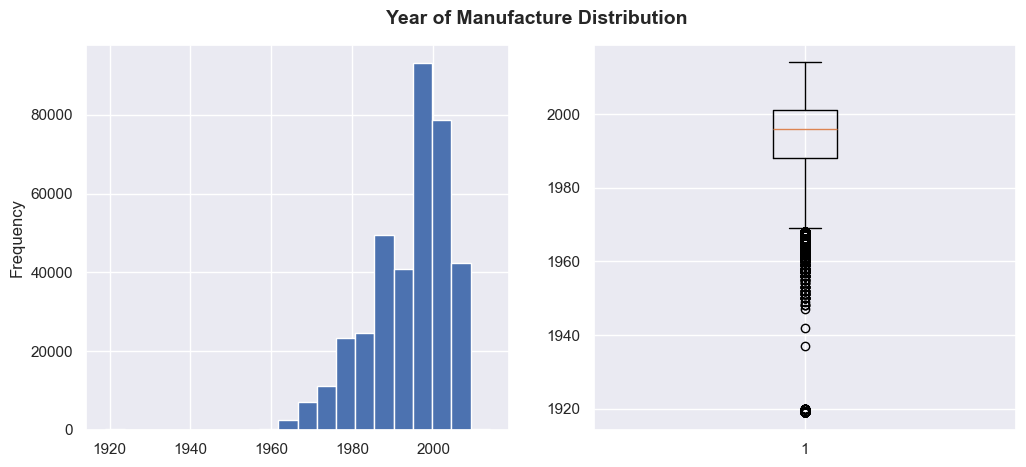

In [14]:
# Check year of manufacture distribution
fig, (ax, ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(12, 5))

ax.hist(df['YearMade'][df['YearMade'] != 1000], bins=20)
ax1.boxplot(df['YearMade'][df['YearMade'] != 1000])

ax.set_ylabel('Frequency')

fig.suptitle('Year of Manufacture Distribution',
             y=0.95,
             fontsize=14,
             fontweight='bold');

* The Histogram shows a <b>left-skewed distribution</b>, where most of the data fall between the `early 1990s` and `early 2000s`.
* The Boxplot highlights several outliers indicating that some heavy machines were built between the `1920s` and `early 1970s` period.
* The <b>median</b> year of manufacture sits between `late 1990s` and `early 2000s`.

As the mean is sensitive to outliers and skewed data, replacing the invalid manufacture year with the <b>median</b> makes more sense.

In [15]:
# Create a copy of the original dataframe
df_copy = df.copy()

In [16]:
# Replace invalid year of manufature with median
df_copy['YearMade'] = df_copy['YearMade'].replace([1000, 2014, 2013], df_copy['YearMade'].median())

In [17]:
df_copy['YearMade'].describe().T

count   412698.00
mean      1994.02
std          9.22
min       1919.00
25%       1989.00
50%       1995.00
75%       2001.00
max       2012.00
Name: YearMade, dtype: float64

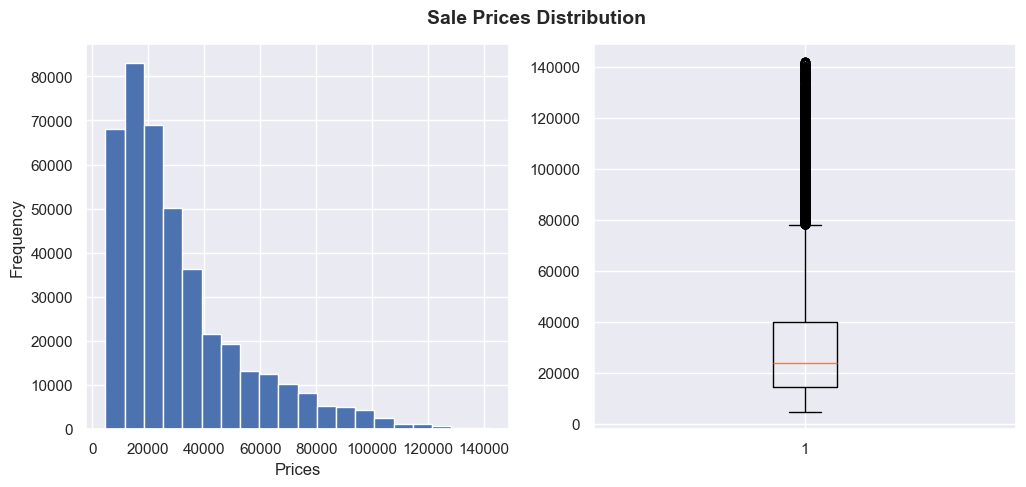

In [18]:
# Check sale prices distribution
fig, (ax, ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(12, 5))

ax.hist(df_copy['SalePrice'], bins=20)
ax1.boxplot(df_copy['SalePrice'])

ax.set_xlabel('Prices')
ax.set_ylabel('Frequency')

fig.suptitle('Sale Prices Distribution',
             y=0.95,
             fontsize=14,
             fontweight='bold');

* The sale prices Histogram shows a <b>right-skewed distribution</b> of data, where most sale prices are concentrated between `10,000` and `40,000`.
* The <b>highest frequency</b> of sale prices is in the range of `10,000` to `20,000`, followed by the `20,000` to `30,000` range. There's a significant drop in frequency as the sale prices increases past `50,000`.
* The Botplot shows a <b>large number of outliers</b> indicating sale prices that go up to `140,000`.
* The <b>median</b> sale price is around `22,000`.

In [19]:
# Check Enclosure values
df_copy['Enclosure'].value_counts(dropna=False)

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
NaN                       334
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

The column `Enclosure` also contains some inconsistent and redudant data as well as missing values. For instance:
* The values `EROPS w AC` and `EROPS AC` appear to be the same.
* `None or Unspecified` basically indicate missing values (NaN).

We can merge the redundant values, thus, reducing the number of categories, then fill the missing values with the <b>mode</b> (most frequent value).

In [20]:
# Replace 'None or Unspecified' with 'NaN'
df_copy['Enclosure'] = df_copy['Enclosure'].replace('None or Unspecified', np.NaN)

In [21]:
# Replace 'EROPS AC' with 'EROPS w AC'
df_copy.loc[df_copy['Enclosure'] == 'EROPS AC', 'Enclosure'] = 'EROPS w AC'

In [22]:
# Fill missing values with mode()
df_copy['Enclosure'] = df_copy['Enclosure'].fillna(df_copy['Enclosure'].mode()[0])

In [23]:
# Check the values of the column
df_copy['Enclosure'].value_counts(dropna=False)

Enclosure
OROPS         178307
EROPS         141769
EROPS w AC     92619
NO ROPS            3
Name: count, dtype: int64

<br>

#### Sales Performance over Time

In [24]:
# Cast sale dates to datetime and sort by date
df_copy['saledate'] = pd.to_datetime(df_copy['saledate'])

df_copy.sort_values(by='saledate').head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.00,1126363,8434,132,18.00,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.00,1194089,10150,132,99.00,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.00,1473654,4139,132,99.00,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.00,1327630,8591,132,99.00,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.00,1336053,4089,132,99.00,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


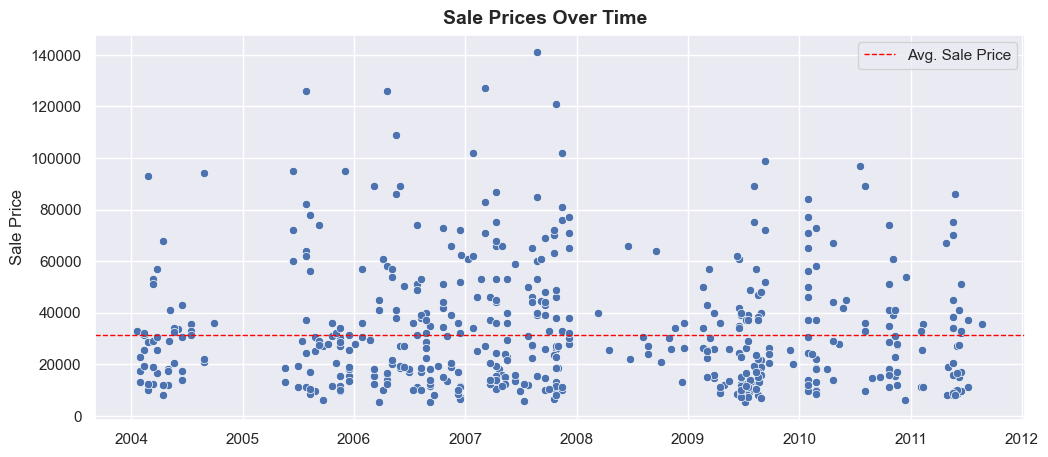

In [25]:
# Check sale prices over time
fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.scatterplot(data=df_copy,
                     x=df_copy['saledate'][:500], 
                     y=df_copy['SalePrice'][:500])

# Calculate the mean sale price
price_mean = np.mean(df_copy['SalePrice'])

ax.axhline(price_mean,
           color='red', 
           linestyle='--',
           linewidth=1,
           label='Avg. Sale Price')

ax.set_xlabel(None)

ax.legend()

ax.set_ylabel('Sale Price')

fig.suptitle('Sale Prices Over Time',
             y=0.93,
             fontsize=14,
             fontweight='bold');

* The scatterplot shows <u>no clear upward</u> or <u>downward trend</u> in sale prices over the observed time period. The prices appear relatively stable with fluctuations around various points in time.
* We notice that the majority of sale prices are clustered below the <b>mean line</b>. This indicates that most heavy machines sold at lower prices over the years. High-priced sales — `greater than 60,000`, are less frequent but occur throughout the time period.
* Some outliers with <b>extremely high-priced sales</b> — `greater than 100,000` also occur less frequently between `2004` and `2008`. 

In [26]:
# Derive day, month, and year from sale dates
df_copy['SaleDay'] = df_copy['saledate'].dt.day
df_copy['SaleMonth'] = df_copy['saledate'].dt.month
df_copy['SaleYear'] = df_copy['saledate'].dt.year

# Remove sale date column
df_copy = df_copy.drop(columns=['saledate'], axis=1)

df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleDay,SaleMonth,SaleYear
0,1139246,66000.00,999089,3157,121,3.00,2004,68.00,Low,521D,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,16,11,2006
1,1139248,57000.00,117657,77,121,3.00,1996,4640.00,Low,950FII,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,26,3,2004
2,1139249,10000.00,434808,7009,121,3.00,2001,2838.00,High,226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,2,2004
3,1139251,38500.00,1026470,332,121,3.00,2001,3486.00,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,5,2011
4,1139253,11000.00,1057373,17311,121,3.00,2007,722.00,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,7,2009


In [27]:
# Check yearly sales counts and average sale prices
yearly_sales = df_copy.groupby('SaleYear', as_index=False)['SalePrice'].agg(SalesCount='count', AveragePrice='mean')

# Convert Sales Count and Average Sale Prices to thousands
yearly_sales['SalesCount'] = yearly_sales['SalesCount'] / 1_000
yearly_sales['AveragePrice'] = yearly_sales['AveragePrice'] / 1_000

yearly_sales

,SaleYear,SalesCount,AveragePrice
0,1989,4.81,28.45
1,1990,4.53,30.88
2,1991,5.11,31.27
3,1992,5.52,28.57
4,1993,6.30,29.92
5,1994,7.93,31.09
6,1995,8.53,29.06
7,1996,8.83,30.59
8,1997,9.79,30.77
9,1998,13.05,31.58


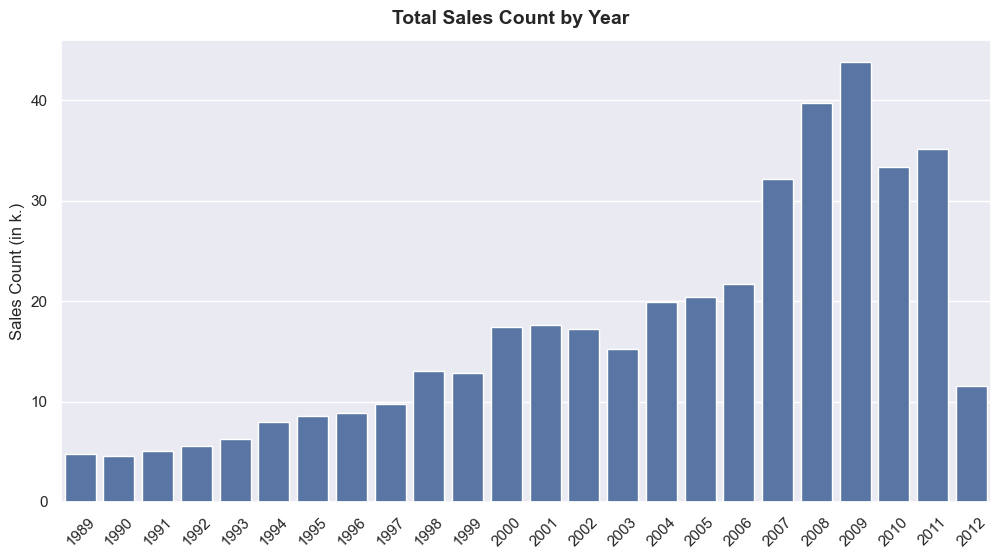

In [28]:
# Visualize total sales count by year
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=yearly_sales,
             x=yearly_sales['SaleYear'], 
             y=yearly_sales['SalesCount'],
             ax=ax);

plt.xticks(rotation=45)

ax.set_xlabel(None)
ax.set_ylabel('Sales Count (in k.)')

fig.suptitle('Total Sales Count by Year',
             y=0.93,
             fontsize=14,
             fontweight='bold');

* The data shows a steady <b>increase in sales count</b> over time between `1989` and `2008`, reaching its highest peak in `2009` at `over 40,000` sales.
* A noticeable <b>decline in sales</b> can be observed in `2010` before slightly jumping back up in `2011`.

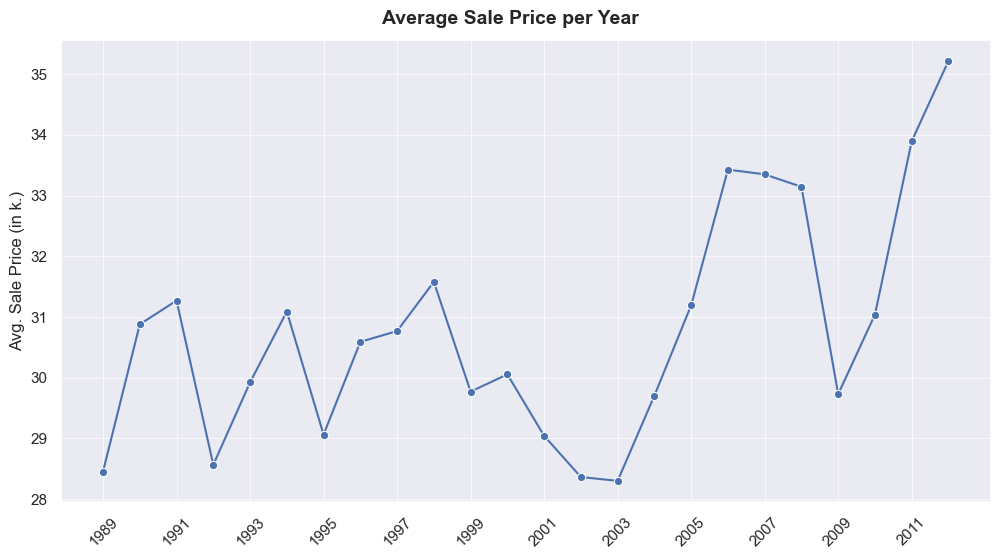

In [29]:
# Visualize average sale price by year
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=yearly_sales,
             x=yearly_sales['SaleYear'], 
             y=yearly_sales['AveragePrice'],
             color='b',
             marker='o',
             ax=ax)

ax.set_xticks(list(range(yearly_sales['SaleYear'].min(), yearly_sales['SaleYear'].max()+1, 2)))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set_xlabel(None)
ax.set_ylabel('Avg. Sale Price (in k.)')

ax.grid(linewidth=0.5)

fig.suptitle('Average Sale Price per Year',
             y=0.93,
             fontsize=14,
             fontweight='bold');

* The data shows <b>considerable fluctuations</b> in average sale prices between `1989` and `2003` ranging from `28,000` to `32,000`.
* There is a <b>steady increase</b> in average sale prices between `2003` and `2007`, with prices rising up to over `33,000`, followed by a <b>sharp decrease</b> in `2009` with average sale prices dipping `below 30,000` before jumping back up in 2011, reaching almost `34,000`.

In [30]:
# Check monthly sales count and average sale prices
monthly_sales = df_copy.groupby('SaleMonth', as_index=False)['SalePrice'].agg(SalesCount='count', AveragePrice='mean')

monthly_sales['SalesCount'] = monthly_sales['SalesCount'] / 1_000
monthly_sales['AveragePrice'] = monthly_sales['AveragePrice'] / 1_000

monthly_sales

,SaleMonth,SalesCount,AveragePrice
0,1,11.18,33.60
1,2,56.32,33.27
2,3,59.35,31.44
3,4,30.46,30.83
4,5,31.99,31.52
5,6,47.05,30.58
6,7,15.48,30.61
7,8,22.54,30.57
8,9,43.21,30.02
9,10,29.53,31.11


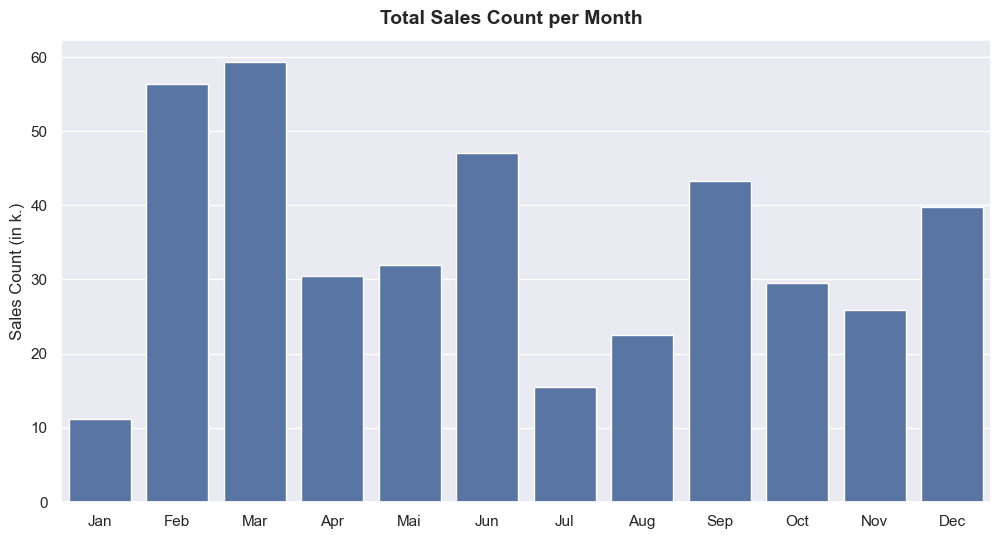

In [31]:
# Visualize total sales count by month
fig, ax = plt.subplots(figsize=(12, 6))

mon_dict = {1: 'Jan',
            2: 'Feb',
            3: 'Mar',
            4: 'Apr',
            5: 'Mai',
            6: 'Jun',
            7: 'Jul',
            8: 'Aug',
            9: 'Sep',
            10: 'Oct',
            11: 'Nov',
            12: 'Dec'}

sns.barplot(data=monthly_sales,
             x=monthly_sales['SaleMonth'].map(mon_dict), 
             y=monthly_sales['SalesCount'],
             ax=ax);

ax.set_xlabel(None)
ax.set_ylabel('Sales Count (in k.)')

fig.suptitle('Total Sales Count per Month',
             y=0.93,
             fontsize=14,
             fontweight='bold');

* The highest sales counts are observed in <b>February</b> and <b>March</b>, with both months showing close to or `above 50,000` sales.
* <b>January</b> and <b>July</b> have the lowest sales counts, with the remaining months exhibiting moderate sales.

In [32]:
# Check sales count and average sale prices by state
states_sales = df_copy.groupby('state',
                               as_index=False)['SalePrice'].agg(SalesCount='count',
                                                                AveragePrice='mean').sort_values(by='SalesCount',
                                                                                                 ascending=False)
states_sales['SalesCount'] = states_sales['SalesCount'] / 1_000
states_sales['AveragePrice'] = states_sales['AveragePrice'] / 1_000

states_sales[:10]

,state,SalesCount,AveragePrice
8,Florida,67.32,34.39
43,Texas,53.11,32.98
4,California,29.76,29.82
48,Washington,16.22,27.69
9,Georgia,14.63,32.27
19,Maryland,13.32,28.62
23,Mississippi,13.24,32.57
34,Ohio,12.37,28.23
12,Illinois,11.54,29.09
5,Colorado,11.53,31.78


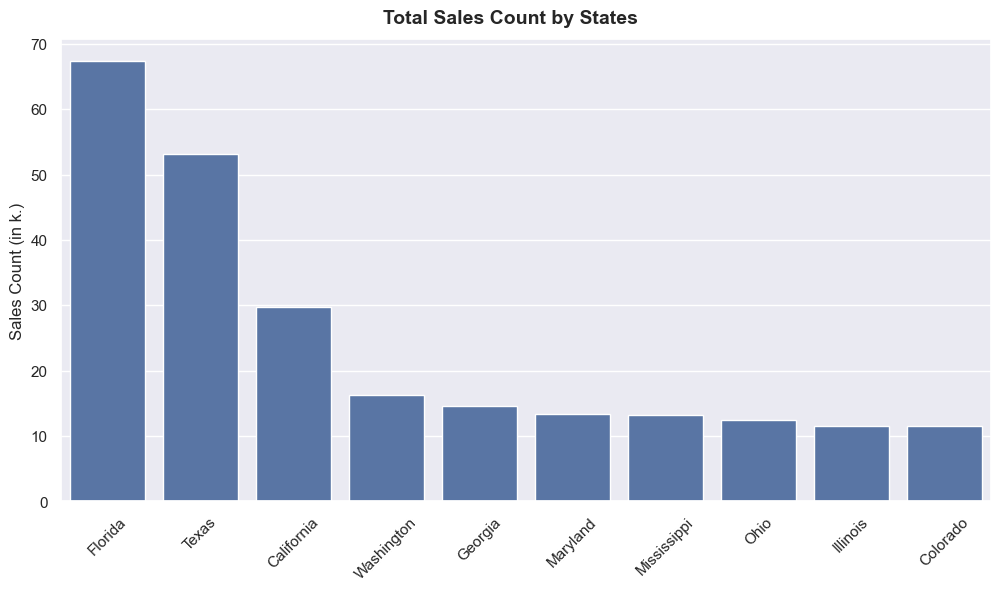

In [33]:
# Visualize sales count and average sale prices by state
fig, ax = plt.subplots(figsize=(12, 6))

top_10 = states_sales.head(10)

sns.barplot(data=top_10,
             x=top_10['state'], 
             y=top_10['SalesCount'],
             ax=ax);

plt.xticks(rotation=45)

ax.set_xlabel(None)
ax.set_ylabel('Sales Count (in k.)')

fig.suptitle('Total Sales Count by States',
             y=0.93,
             fontsize=14,
             fontweight='bold');

* <b>Florida</b> has the highest sales count `exceeding 60,000`, followed by <b>Texas</b> with `over 50,000` and lastly <b>California</b> with `almost 30,000` total sales.
* The <b>remaning states</b> all have proportionately sales count `below 20,000`.

<br>

## 5. Data Preparation & Preprocessing

> #### 5.1 Categorical Encoding

In [34]:
# Select object-type features for categorical encoding (categories are numerically encoded)
obj_cols = df_copy.select_dtypes(include=[object]).columns

obj_cols

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [35]:
# Casting object-type features to category
df_copy[obj_cols] = df_copy[obj_cols].astype('category')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

> #### 5.2 Handling Missing Values

>> <b>5.2.1 Filling Numerical Nulls</b>

In [36]:
num_cols = df_copy.select_dtypes(include=['int', 'float']).columns

num_cols

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'SaleDay',
       'SaleMonth', 'SaleYear'],
      dtype='object')

In [37]:
# Check nulls percentages
df_copy[num_cols].isna().sum() / df_copy.shape[0] * 100

SalesID                     0.00
SalePrice                   0.00
MachineID                   0.00
ModelID                     0.00
datasource                  0.00
auctioneerID                4.88
YearMade                    0.00
MachineHoursCurrentMeter   64.26
SaleDay                     0.00
SaleMonth                   0.00
SaleYear                    0.00
dtype: float64

<b>auctioneerID</b> has less than `5%` missing values, while <b>MachineHoursCurrentMeter</b> has `over 60%`.

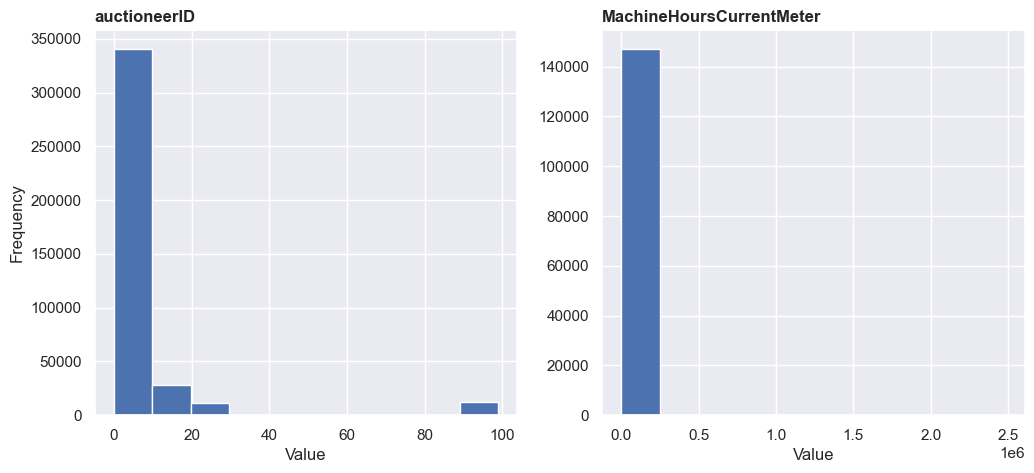

In [38]:
# Check distribution of auctioneerID and MachineHoursCurrentMeter columns
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

ax1.hist(df_copy['auctioneerID'])

ax1.set_title('auctioneerID',
              loc='left',
              fontweight='bold')

ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.set_xlabel('Value')

ax2.hist(df_copy['MachineHoursCurrentMeter'])

ax2.set_title('MachineHoursCurrentMeter',
              loc='left',
              fontweight='bold');

Both graphs show <b>right-skewed distrbutioned</b> data, so impute missing values with the <b>median</b>.

In [39]:
for col in df_copy.columns:
    if pd.api.types.is_numeric_dtype(df_copy[col]):
        if df_copy[col].isna().sum():
            df_copy[col + '_is_missing'] = df_copy[col].isna() # add a column (True/False) to keep track of imputed missing values
            df_copy[col] = df_copy[col].fillna(df_copy[col].median()) # fill missing values with median

df_copy[num_cols].isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
SaleDay                     0
SaleMonth                   0
SaleYear                    0
dtype: int64

>> <b> 5.2.2 Fill Categorical Nulls </b>

In [40]:
cat_cols = df_copy.select_dtypes(include=['category']).columns

# Check null percentages
df_copy[cat_cols].isna().sum() / df_copy.shape[0] * 100

UsageBand                 82.15
fiModelDesc                0.00
fiBaseModel                0.00
fiSecondaryDesc           34.10
fiModelSeries             85.78
fiModelDescriptor         81.87
ProductSize               52.49
fiProductClassDesc         0.00
state                      0.00
ProductGroup               0.00
ProductGroupDesc           0.00
Drive_System              74.05
Enclosure                  0.00
Forks                     52.09
Pad_Type                  80.35
Ride_Control              62.99
Stick                     80.35
Transmission              54.44
Turbocharged              80.35
Blade_Extension           93.70
Blade_Width               93.70
Enclosure_Type            93.70
Engine_Horsepower         93.70
Hydraulics                20.01
Pushblock                 93.70
Ripper                    74.09
Scarifier                 93.70
Tip_Control               93.70
Tire_Size                 76.34
Coupler                   46.53
Coupler_System            89.10
Grouser_

For categorical variables, we'll fill missing values with their <b>code</b> attributes.

It is important to note that missing categorical values have a `-1` code.

In [41]:
# Example
df_copy['Steering_Controls'][df_copy['Steering_Controls'].isna()][:5].cat.codes

2   -1
3   -1
4   -1
5   -1
6   -1
dtype: int8

In [42]:
# Turn categorical variables into numerics and fill missing with their codes
for col in df_copy.columns:
    if pd.api.types.is_categorical_dtype(df_copy[col]):
        df_copy[col + '_is_missing'] = df_copy[col].isna()
        df_copy[col] = df_copy[col].cat.codes + 1 # this ensures that nulls will be have a value of 0

# Check null counts
df_copy.isna().sum().sum()

C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\4046602072.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_copy[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\4046602072.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_copy[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\4046602072.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_copy[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\4046602072.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype

0

In [43]:
# Check dataframe dimensions
df_copy.shape

(412698, 101)

Our dataframe now has `101` columns.

In [44]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.00,999089,3157,121,3.00,2004,68.00,2,963,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.00,117657,77,121,3.00,1996,4640.00,2,1745,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.00,434808,7009,121,3.00,2001,2838.00,1,336,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.00,1026470,332,121,3.00,2001,3486.00,1,3716,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.00,1057373,17311,121,3.00,2007,722.00,3,4261,...,True,True,True,True,True,True,True,True,True,True


<br>

## 6. Modelling

In [45]:
# Import sklearn tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
# According to Kaggle, the validation set should contain data from Jan, 1, 2012 till Apr, 30, 2012
df_train = df_copy[:][df_copy['SaleYear'] != 2012]
df_valid = df_copy[:][df_copy['SaleYear'] == 2012]

# Split data into features and labels
X_train, y_train = df_train.drop(columns='SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_valid.drop(columns='SalePrice', axis=1), df_valid['SalePrice']

Fitting over `400K` samples is time consuming and requires a lot of computational power, so we'll test our model on a subset of the data.

<b>Random Forest Regressor</b> model has a built-in parameter called `max_samples` which allows us to specify how many samples to fit to the model. 

In [46]:
# Instantiate a Random Forest Regressor model
reg = RandomForestRegressor(n_jobs=-1,         # Use all CPU cores
                            random_state=41,   # Alternative to setting static seed
                            max_samples=20000) # Specify how many samples to fit 

In [47]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=41)

In [48]:
reg.score(X_valid, y_valid)

0.8548529928338412

Baseline <b>Random Forest Regressor</b> model yields an `R2-score` (Coefficient of Determination) of `0.85`.

As a reminder, our evaluation metric for this analysis is the <b>RMSLE</b> (Root Mean Squared Log Error). I.e. the lower the value, the higher the prediction accuracy.

## 7. Experimentation & Evaluation

In [49]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Create customer function to return the square root of MSLE
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create custom evaluation function
def model_scores(model, X_train, X_valid, y_train, y_valid):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {'Train MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, valid_preds),
              'Train RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, valid_preds),
              'Train R2': r2_score(y_train, train_preds),
              'Valid R2': r2_score(y_valid, valid_preds)}
    return scores

In [50]:
model_scores(reg, X_train, X_valid, y_train, y_valid)

{'Train MAE': 5017.738137139295,
 'Valid MAE': 6617.205486045105,
 'Train RMSLE': 0.23597877750516283,
 'Valid RMSLE': 0.2720323064454567,
 'Train R2': 0.884725731265357,
 'Valid R2': 0.8548529928338412}

In [51]:
# Store baseline model scores in a dataframe
scores = model_scores(reg, X_train, X_valid, y_train, y_valid)

df_scores = pd.DataFrame(scores,
                         index=['Score']).T

df_scores

,Score
Train MAE,5017.74
Valid MAE,6617.21
Train RMSLE,0.24
Valid RMSLE,0.27
Train R2,0.88
Valid R2,0.85


Our baseline model achieved an `RMSLE` score of `0.27`.

> #### 7.1. Tuning Hyperparameters using `RandomizedSearchCV`

In [52]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': ['sqrt', 0.5, 1, None],
           'max_samples': [20000]}

# Instantiate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=41),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              n_jobs=-1)

# Fit model to data
rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=41),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 0.5, 1, None],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [53]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 20000,
 'max_features': None,
 'max_depth': None}

In [54]:
rs_model.score(X_valid, y_valid)

0.8268538347424355

<b> Fast-Forward </b>: We kept re-iterating our `RandomizedSearchCV` until we've reached the following best hyperparameters for our model:

With `n_iter`: 100
* `n_estimators`: 90
* `min_samples_leaf`: 1
* `min_samples_split`: 4
* `max_feature`: 0.5
* `max_depth`: None

In [55]:
tuned_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=4,
                                    max_features=0.5,
                                    max_depth=None,
                                    n_jobs=-1,
                                    random_state=41)

tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=4, n_estimators=90,
                      n_jobs=-1, random_state=41)

In [56]:
# Baseline model scores
df_scores.T

,Train MAE,Valid MAE,Train RMSLE,Valid RMSLE,Train R2,Valid R2
Score,5017.74,6617.21,0.24,0.27,0.88,0.85


In [57]:
# Tuned model scores
df_tuned_scores = pd.DataFrame(model_scores(tuned_model, X_train, X_valid, y_train, y_valid),
                               index=['Score']).T

df_tuned_scores.T

,Train MAE,Valid MAE,Train RMSLE,Valid RMSLE,Train R2,Valid R2
Score,1828.92,5880.56,0.10,0.24,0.98,0.88


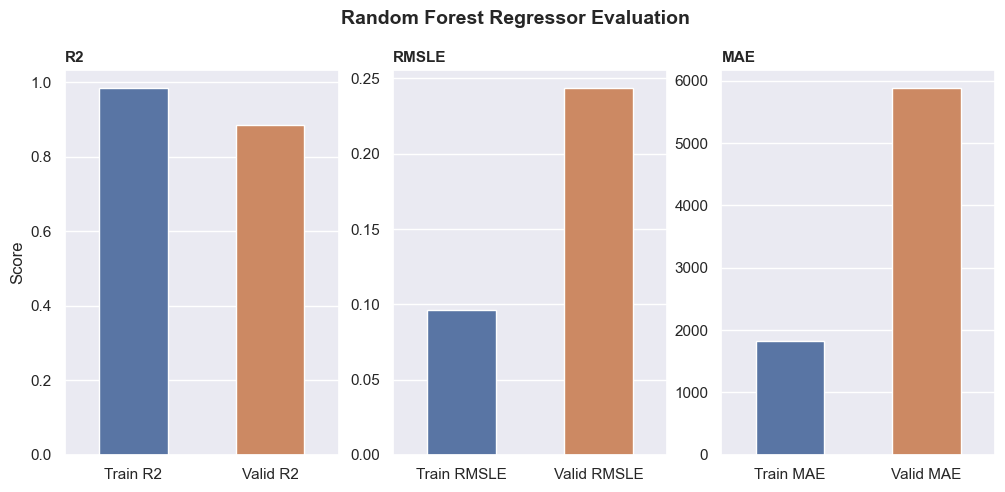

In [58]:
# Visualize tuned model scores
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(12, 5))

MAE_score = df_tuned_scores.loc[df_tuned_scores.index.isin(['Train MAE', 'Valid MAE'])]
RMSLE_score = df_tuned_scores.loc[df_tuned_scores.index.isin(['Train RMSLE', 'Valid RMSLE'])]
R2_score = df_tuned_scores.loc[df_tuned_scores.index.isin(['Train R2', 'Valid R2'])]

sns.barplot(data=R2_score,
            x=R2_score.index,
            y=R2_score['Score'],
            hue=R2_score.index,
            width=0.5,
            ax=ax1)

ax1.set_xlabel(None)
ax1.set_ylabel('Score')
ax1.set_title('R2',
              loc='left',
              fontsize=11,
              fontweight='bold')

sns.barplot(data=RMSLE_score,
            x=RMSLE_score.index,
            y=RMSLE_score['Score'],
            hue=RMSLE_score.index,
            width=0.5,
            ax=ax2)

ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_title('RMSLE',
              loc='left',
              fontsize=11,
              fontweight='bold')

sns.barplot(data=MAE_score,
            x=MAE_score.index,
            y=MAE_score['Score'],
            hue=MAE_score.index,
            width=0.5,
            ax=ax3);

ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_title('MAE',
              loc='left',
              fontsize=11,
              fontweight='bold');

fig.suptitle('Random Forest Regressor Evaluation',
             y=1,
             fontsize=14,
             fontweight='bold');

* Our tuned <b>Random Forest Regressor</b> model now yields an `RMSLE` value of approx. `0.24`.
* We also see some improvements in the `R2 Score` and `MAE` (Mean Absolute Error) value, with approx `0.88` and `5880` respectively, compared to baseline.

> #### 7.2. Make Predictions on Test Data

In [59]:
# Import test data
df_test = pd.read_csv('Data/Test.csv', parse_dates=['saledate'])

df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.00,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.00,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.00,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.00,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.00,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [61]:
df_test.shape

(12457, 52)

In [62]:
# Check nulls percentage
test_nulls_perc = df_test.isna().sum() / len(df_test) * 100

test_nulls_perc

SalesID                     0.00
MachineID                   0.00
ModelID                     0.00
datasource                  0.00
auctioneerID                0.00
YearMade                    0.00
MachineHoursCurrentMeter   82.91
UsageBand                  85.28
saledate                    0.00
fiModelDesc                 0.00
fiBaseModel                 0.00
fiSecondaryDesc            31.91
fiModelSeries              83.90
fiModelDescriptor          75.72
ProductSize                51.45
fiProductClassDesc          0.00
state                       0.00
ProductGroup                0.00
ProductGroupDesc            0.00
Drive_System               77.85
Enclosure                   0.02
Forks                      49.36
Pad_Type                   83.08
Ride_Control               65.95
Stick                      83.08
Transmission               61.32
Turbocharged               83.08
Blade_Extension            94.77
Blade_Width                94.77
Enclosure_Type             94.77
Engine_Hor

In [63]:
df_copy.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

We can see that the test dataset is not <u>in the same format</u> as the train and valid dataset. In order to make predictions on the test dataset, we need to <b>standardize</b> it.

In [64]:
# Impute Enclosure missing values with the mode
df_test['Enclosure'] = df_test['Enclosure'].fillna(df_test['Enclosure'].mode()[0])

In [65]:
# Create a preprocessing function
def preprocess_data(df):
    # Replace invalid year of manufacture with median
    df['YearMade'] = df['YearMade'].replace([1000, 2014, 2013], df_copy['YearMade'].median())
    
    # Derive year and month columns
    df['SaleDay'] = df['saledate'].dt.day
    df['SaleMonth'] = df['saledate'].dt.month
    df['SaleYear'] = df['saledate'].dt.year

    # Drop saledate column
    df = df.drop(columns='saledate', axis=1)

    # Fill missing numerical values
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].isna().sum():
                df[col + '_is_missing'] = df[col].isna()
                df[col] = df[col].fillna(df[col].median())

    # Cast object columns to category
    obj_cols = df.select_dtypes(include=[object]).columns
    df[obj_cols] = df[obj_cols].astype('category')

    # Encode categorical values 
    for col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            df[col + '_is_missing'] = df[col].isna()
            df[col] = df[col].cat.codes + 1

    return df

In [66]:
X_test = preprocess_data(df_test)
X_test.head()

C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\2613267234.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\2613267234.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\2613267234.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
C:\Users\t_aym\AppData\Local\Temp\ipykernel_380\2613267234.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
 

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.00,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1995,28555.00,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.00,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.00,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.00,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [67]:
X_test.isna().sum().sum()

0

In [68]:
# Add auctioneerID_is_missing column to test set
X_test['auctioneerID_is_missing'] = False

In [69]:
X_test.shape

(12457, 100)

In [70]:
X_test = X_test.reindex(X_train.columns, axis=1)

In [71]:
# Reorder test set
X_test = X_test[X_train.columns]

In [72]:
X_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'SaleDay', 'SaleMonth',
       'SaleYear', 'auctioneerID_is_missing',
       'MachineHoursCurrentMeter

In [73]:
# Make predictions
test_preds = tuned_model.predict(X_test)

test_preds

array([17268.25396825, 19026.57098765, 53900.95238095, ...,
       12164.29188713, 17321.34259259, 27723.89550265])

In [74]:
# Format test predictions for competition submission
df_preds = pd.DataFrame()

df_preds['SalesID'] = X_test['SalesID']
df_preds['SalesPrice'] = test_preds

df_preds.head()

,SalesID,SalesPrice
0,1227829,17268.25
1,1227844,19026.57
2,1227847,53900.95
3,1227848,68067.89
4,1227863,52907.22


> #### 7.3 Features Importance & Model-driven EDA

In [75]:
tuned_model.feature_importances_

array([4.49529403e-02, 2.53629029e-02, 4.38002510e-02, 2.16957139e-03,
       5.40846570e-03, 1.73650550e-01, 3.99416759e-03, 1.43253455e-03,
       4.43725736e-02, 4.99830425e-02, 7.90797242e-02, 5.50428100e-03,
       2.30872924e-02, 1.41769930e-01, 4.34615943e-02, 1.00868555e-02,
       4.81752310e-03, 2.18394059e-03, 3.67655457e-03, 4.85537364e-02,
       5.10294604e-04, 2.64690404e-04, 1.14345624e-03, 1.96807926e-04,
       1.28366033e-03, 3.89018721e-05, 5.35928499e-04, 9.01835556e-03,
       5.20902848e-04, 1.95114002e-03, 2.98911062e-03, 2.72688632e-03,
       3.96547445e-03, 1.11758261e-03, 6.03246892e-04, 1.00408567e-02,
       1.28533140e-03, 1.34389165e-02, 1.53468122e-03, 9.90915567e-04,
       1.13739870e-03, 1.23673330e-03, 2.91601109e-03, 8.27452593e-04,
       7.62800922e-04, 5.30208043e-04, 3.20017519e-04, 2.55739649e-03,
       1.24940272e-03, 5.35378479e-04, 3.31893263e-04, 1.06516539e-02,
       1.11461255e-02, 7.56541304e-02, 3.95497162e-04, 1.79663625e-03,
      

In [76]:
def feature_importance(columns, importances):
    # Create a dataframe out of our feature importances
    df = (pd.DataFrame({'Features':columns,
                        'Importances':importances})
          .sort_values(by='Importances', ascending=False)
          .reset_index(drop=True)
          ).head(10)
    
    # Plot our features importances in a horizontal bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.barplot(data=df,
                     x='Importances',
                     y='Features', 
                     orient='h')
    
    fig.suptitle('Feature Importances',
                 y=0.95,
                 fontsize=14,
                 fontweight='bold');
    return df

,Features,Importances
0,YearMade,0.17
1,ProductSize,0.14
2,fiSecondaryDesc,0.08
3,SaleYear,0.08
4,fiBaseModel,0.05
5,Enclosure,0.05
6,SalesID,0.04
7,fiModelDesc,0.04
8,ModelID,0.04
9,fiProductClassDesc,0.04


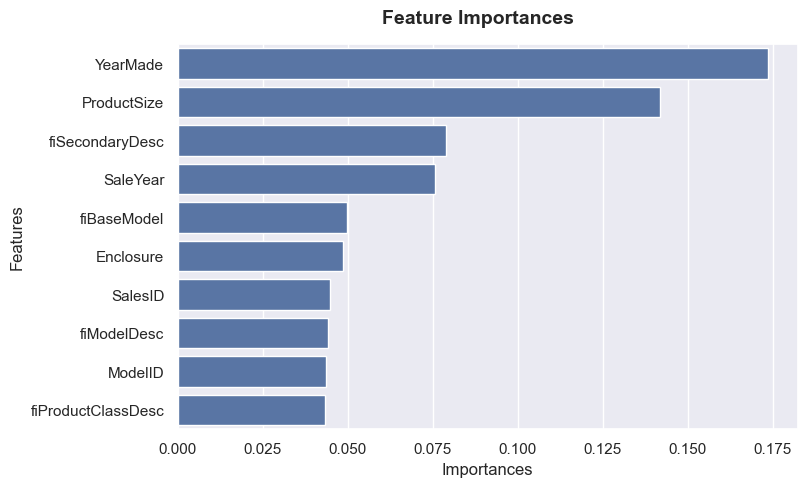

In [77]:
feature_importance(X_train.columns, tuned_model.feature_importances_)

* Our model determined that the most two important predictive features are <b>ProductSize</b> and <b>YearMade</b>.

Let's check the sales count and average sale prices by product size and year of manufacture.

In [78]:
# Check sales count and average sale prices by product size
sales_by_prod_size = df_copy.groupby('ProductSize', as_index=False)['SalePrice'].agg(SalesCount='count',
                                                                                     AveragePrice='mean')

sales_by_prod_size['SalesCount'] = sales_by_prod_size['SalesCount'] / 1_000
sales_by_prod_size['AveragePrice'] = sales_by_prod_size['AveragePrice'] / 1_000

sales_by_prod_size

,ProductSize,SalesCount,AveragePrice
0,0,216.60,24.05
1,1,6.28,17.50
2,2,21.40,42.02
3,3,51.30,47.83
4,4,64.34,45.70
5,5,25.72,15.19
6,6,27.06,32.51


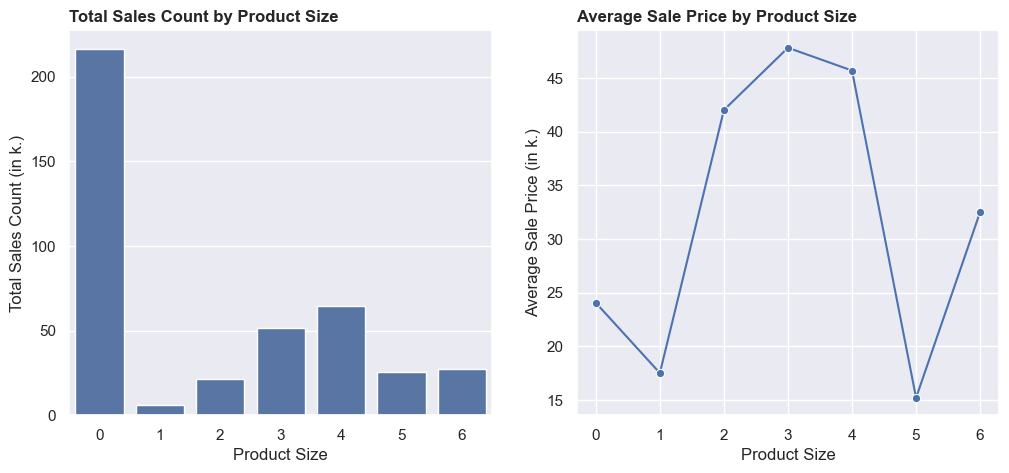

In [79]:
# Visualize sales count and average sale prices by product size
fig, (ax, ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(12, 5))

sns.barplot(data=sales_by_prod_size,
            x=sales_by_prod_size['ProductSize'],
            y=sales_by_prod_size['SalesCount'],
            ax=ax)

ax.set_xlabel('Product Size')
ax.set_ylabel('Total Sales Count (in k.)')
ax.set_title('Total Sales Count by Product Size',
             loc='left',
             fontweight='bold')

sns.lineplot(data=sales_by_prod_size,
             x=sales_by_prod_size['ProductSize'],
             y=sales_by_prod_size['AveragePrice'],
             marker='o',
             ax=ax1)

ax1.set_xlabel('Product Size')
ax1.set_ylabel('Average Sale Price (in k.)')
ax1.set_title('Average Sale Price by Product Size',
              loc='left',
              fontweight='bold');

* The data shows that heavy machines with <b>product size `0`</b> has the highest sales count, drastically outpacing all other product sizes with over `200,000` sales.
* Interestingly, product size `0` machines sold at the third lowest price tag on average compared for instance to product size `2`, `3`, and `4`, all having significantly much higher sale price on average.

The visualizations highlight a clear preference for heavy machines with product size `0`, and their mid average sale prices suggest a budget-friendly option leading to a wider availablity and accessibility in the market, which subsequently lead to higher sales volume.

In [80]:
# Check sales count and average sale prices by year of manufacture
sales_by_year_prod = df_copy.groupby('YearMade', as_index=False)['SalePrice'].agg(SalesCount='count',
                                                                                  AveragePrice='mean').sort_values(by='SalesCount',
                                                                                                                   ascending=False)

sales_by_year_prod['SalesCount'] = sales_by_year_prod['SalesCount'] / 1_000
sales_by_year_prod['AveragePrice'] = sales_by_year_prod['AveragePrice'] / 1_000

sales_by_year_prod

,YearMade,SalesCount,AveragePrice
52,1995,55.20,23.90
62,2005,22.10,38.16
55,1998,21.75,34.90
61,2004,20.91,35.27
56,1999,19.27,32.14
...,...,...,...
6,1949,0.00,30.00
4,1947,0.00,9.00
3,1942,0.00,51.00
2,1937,0.00,18.00


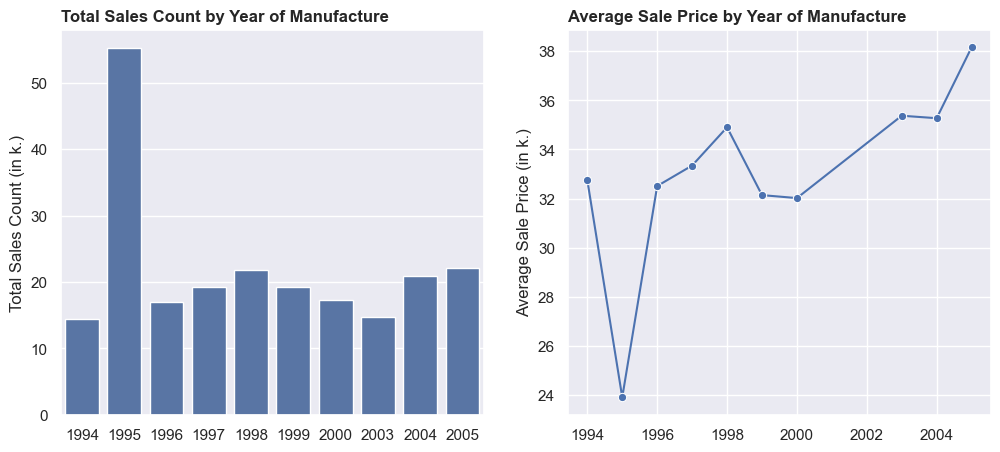

In [81]:
# Visualize sales count and average sale prices by year of manufacture
fig, (ax, ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(12, 5))

top_10 = sales_by_year_prod[:10]

sns.barplot(data=top_10,
            x=top_10['YearMade'],
            y=top_10['SalesCount'],
            ax=ax)

ax.set_xlabel(None)
ax.set_ylabel('Total Sales Count (in k.)')
ax.set_title('Total Sales Count by Year of Manufacture',
             loc='left',
             fontweight='bold')

sns.lineplot(data=top_10,
             x=top_10['YearMade'],
             y=top_10['AveragePrice'],
             marker='o',
             ax=ax1)

ax1.set_xlabel(None)
ax1.set_ylabel('Average Sale Price (in k.)')
ax1.set_title('Average Sale Price by Year of Manufacture',
              loc='left',
              fontweight='bold');

* Heavy machines <b>manufactured in 1995</b> have the highest sales count by a large margin compared to all other models.
* Similarily to product size `0`, 1995 manufactured machines sold at some of the lowest price tags on average, at approx. `$24,000`.
* Both scenarios reflect a potential connection between the two features, leading to high volume sales driven by lower pricing.

To further investigate this connection, let's check which product size machines manufactured in 1995 sold the most throughout the years.

In [82]:
# Crosstab product size and year of manufacture
year_size_prod = pd.crosstab(df_copy['YearMade'], df_copy['ProductSize'])

year_size_prod

ProductSize,0,1,2,3,4,5,6
YearMade,,,,,,,
1919,8,0,107,2,1,6,3
1920,4,1,1,0,0,9,2
1937,1,0,0,0,0,0,0
1942,0,0,1,0,0,0,0
1947,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2008,877,34,12,181,240,243,104
2009,115,10,0,8,23,46,10
2010,34,8,0,0,2,9,5


In [83]:
top_1995 = pd.DataFrame(year_size_prod.loc[1995])

top_1995.T

ProductSize,0,1,2,3,4,5,6
1995,27261,557,2392,7265,7082,5736,4907


In [84]:
# Check sales proportion
top_1995.T[0] / sum(top_1995.values) * 100

1995   49.39
Name: 0, dtype: float64

As we expected, <b>1995 manufactured </b>heavy machines with <b>product size `0`</b> contributed the most to high auction sales count thoughout the years.

<br>

### Conclusion

In this analysis, we've built and fine-tuned a machine learning model to predict the prices of heavy machines sold at an auction in 2012 with an `RMSLE` value of approx. `0.24` and an `R2 Score` of `0.88`. Throughout this process, we've explored, cleaned, pre-processed and prepared the data for regression modelling. We've also conducted a <b>Model-driven EDA</b> based on the features our model determined of high predictive importance, further allowing us to understand the model's decision making and uncover more trends in the data that would've been left otherwise hidden.

<b>Further steps</b>:

* Further tuning the model’s hyperparameters to balance the contributions of various features and enhance its predictive performance.
* Reduce the number of features to improve the model’s generalizability.
* Try other machine learning regression models such as Ridge, Lasso and Elastic-Net.
* Compare our predicted sale prices to the test true labels.els.